<a href="https://colab.research.google.com/github/afifahnisa17/machine_learning/blob/main/Jobsheet4_Kuis1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [155]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [156]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [157]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [158]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [159]:
# Data Size
df.shape


(48842, 15)

In [160]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [161]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


Variabel yang memiliki nilai hilang adalah:
- workclass dengan jumlah data kosong 963
- occupation dengan jumlah data kosong 966
- native country dengan jumlah data kosong 274

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [162]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan


# Workclass
df['workclass'] = df['workclass'].fillna(value=df['workclass'].mode()[0])

# Occupation
df['occupation'] = df['occupation'].fillna(value=df['occupation'].mode()[0])

# Native Country
df['native-country'] = df['native-country'].fillna(value=df['native-country'].mode()[0])

# Memeriksa apakah ada data yang hilang sudah bisa diatasi
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [163]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Kolom-kolom yang akan diganti jika mengandung '?'
cols_to_replace = ['workclass', 'occupation', 'native-country', 'education', 'relationship', 'race', 'sex']

# Ganti '?' dengan 'Others'
for col in cols_to_replace:
    df[col] = df[col].replace('?', 'Others')

df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

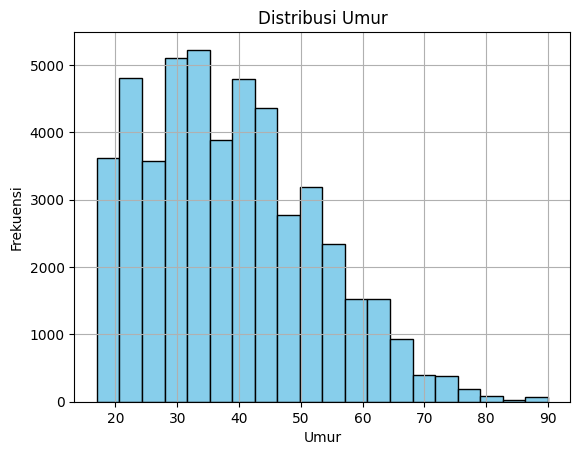

In [164]:
# Jawab 1.1 - Histrogram
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

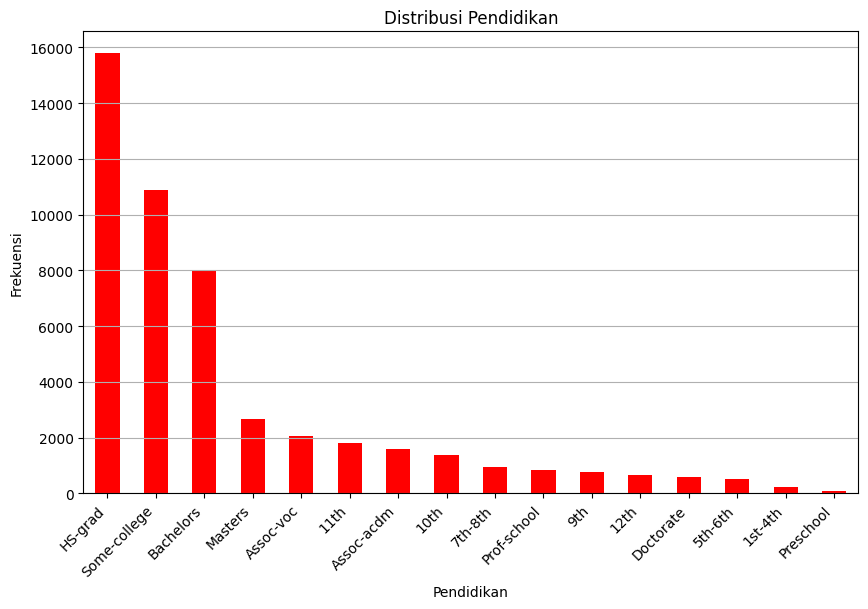

In [165]:
# Jawab 1.2 - Barchart
import matplotlib.pyplot as plt

# Contoh plot bar chart untuk kolom kategori 'Pendidikan'
plt.figure(figsize=(10,6))
df['education'].value_counts().plot(kind='bar', color='red')

plt.title('Distribusi Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Frekuensi')

# Putar label x agar rapi
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y')
plt.show()

/tmp/ipython-input-2480720931.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')


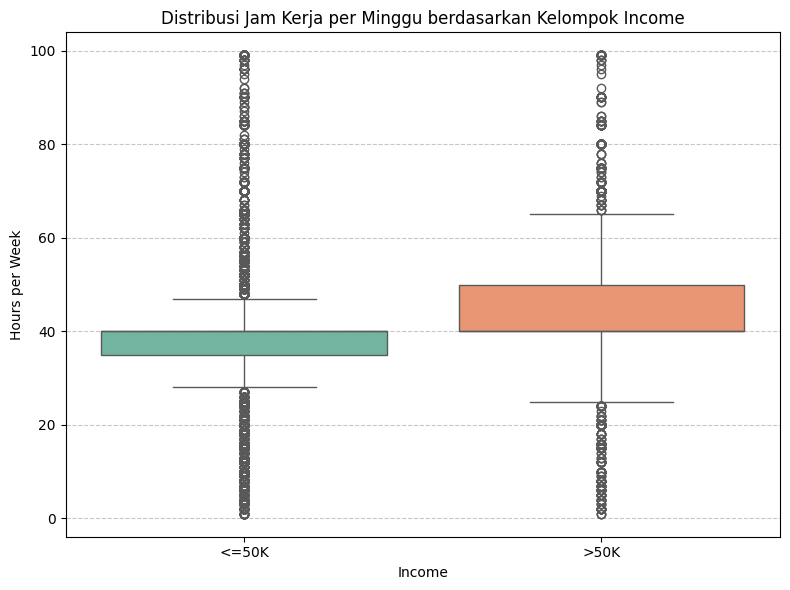

In [168]:
# Jawab 1.3 - Boxplot

# memastikan semua tanda di di kolom income sama
df['income'] = df['income'].str.strip().str.replace(r'\.$', '', regex=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')

plt.title('Distribusi Jam Kerja per Minggu berdasarkan Kelompok Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

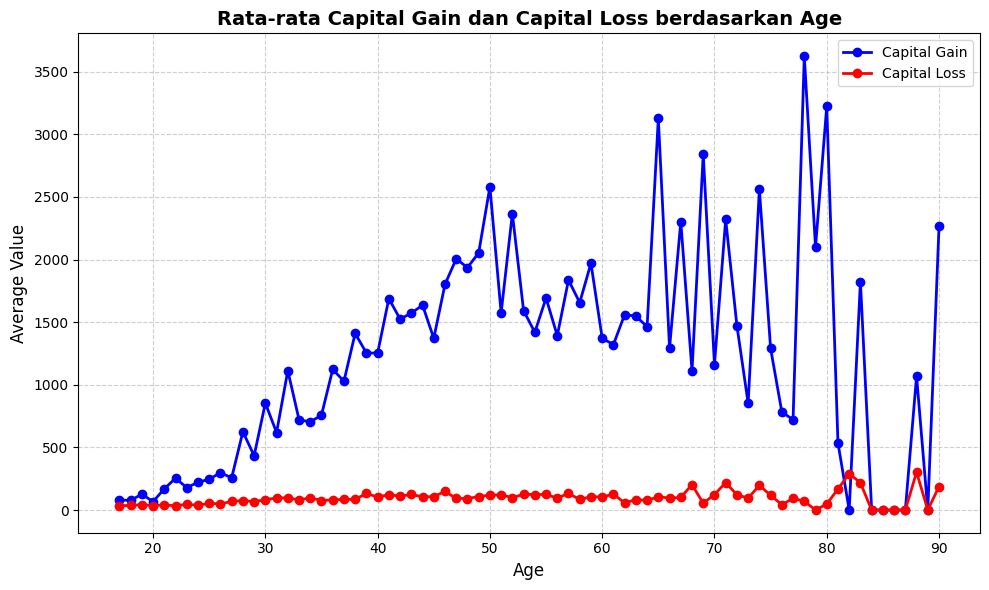

In [170]:
# Jawab 1.4 - Lineplot
import matplotlib.pyplot as plt
import pandas as pd

# Buat data baru
df_grouped = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(10, 6))

# Plot Capital Gain
plt.plot(
    df_grouped['age'],
    df_grouped['capital-gain'],
    label='Capital Gain',
    color='blue',
    linewidth=2,
    marker='o'
)

# Plot Capital Loss
plt.plot(
    df_grouped['age'],
    df_grouped['capital-loss'],
    label='Capital Loss',
    color='red',
    linewidth=2,
    marker='o'
)

plt.title('Rata-rata Capital Gain dan Capital Loss berdasarkan Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(frameon=True, facecolor='white')
plt.grid(True, linestyle='--', alpha=0.6)

# Tata letak rapi
plt.tight_layout()
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
'''
Jawaban 1:
  Berdasarkan pada diagram dibawah ini, distribus age right-skewed (condong ke kanan),
  artinya mayoritas usia berada di rentang dewasa muda hingga paruh baya, sementara usia lanjut jumlahnya lebih sedikit.
Jawaban 2:
  Jika terdapat data hilang pada variabel 'age', maka akan menggunakan mean karena median lebih tahan terhadap outlier dibanding mean.
Jawaban 3:
  Dataset punya 48.842 baris.
  Dari hasil deteksi outlier:
  <=50K ada 11.706 outlier, >50K ada 781 outlier
'''

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


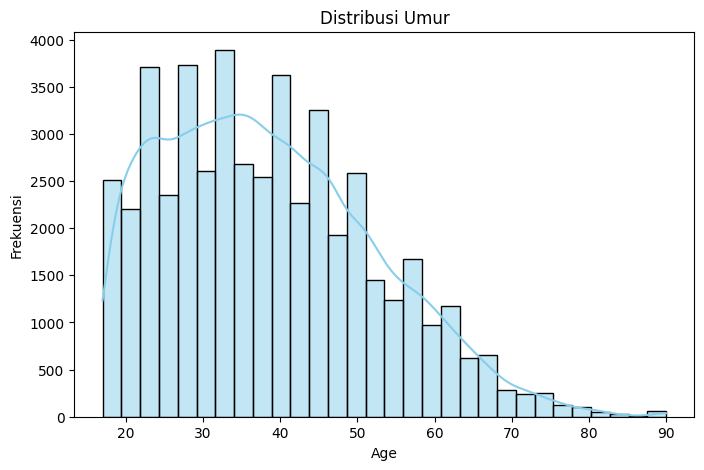

In [173]:
# Pembuktian untuk jawaban 1-2
# Jawaban 1

import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
print(df['age'].describe())

# Visualisasi distribusi age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Umur')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()



In [174]:
# Jawaban 2
print(df['age'].isnull().sum())


0


In [175]:
# Jawaban 3
outlier_counts = {}

for cat in df['income'].unique():
    data = df[df['income'] == cat]['hours-per-week']
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data < lower) | (data > upper)]
    outlier_counts[cat] = len(outliers)

outlier_counts



{'<=50K': 11706, '>50K': 781}

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [176]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [177]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan


# --- Encoding fitur 'Sex' ---
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
print("=== Hasil Setelah Encoding 'Sex' ===")
print(df[['sex']].head(10), "\n")

# --- Encoding fitur 'Sex' ---
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
print("=== Hasil Setelah Encoding 'Income' ===")
print(df[['income']].head(10), "\n")

=== Hasil Setelah Encoding 'Sex' ===
   sex
0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    0
9    1 

=== Hasil Setelah Encoding 'Income' ===
   income
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       1 



# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

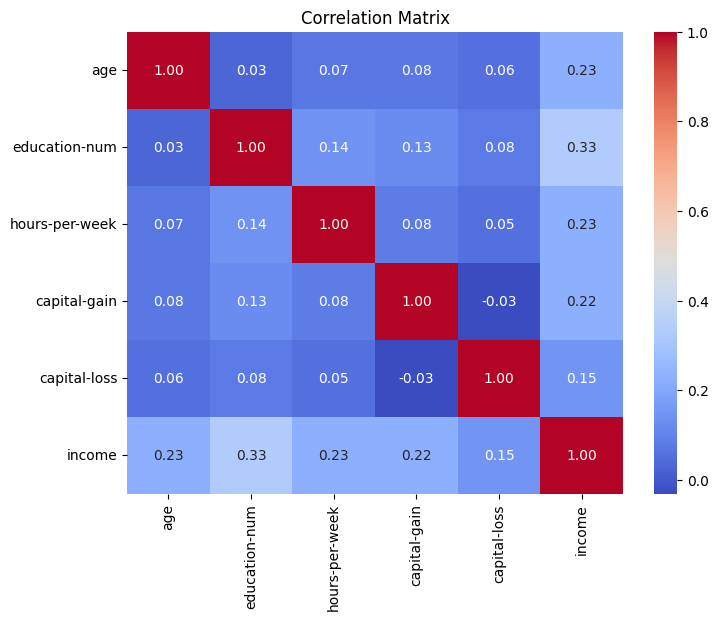

In [178]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih variabel numerik yang relevan
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[cols].corr()

# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [178]:
'''
Interpretasi Korelasi (versi sederhana):

1. Usia (age) ada hubungan positif dengan income (0.23).
   → Semakin tua seseorang, cenderung punya penghasilan lebih tinggi.

2. Pendidikan (education-num) punya korelasi paling kuat dengan income (0.33).
   → Semakin tinggi pendidikan, semakin besar peluang berpenghasilan tinggi.

3. Jam kerja per minggu (hours-per-week) juga berhubungan dengan income (0.23).
   → Orang yang bekerja lebih lama per minggu cenderung berpenghasilan lebih tinggi.

4. Capital-gain (0.22) dan capital-loss (0.15) juga berhubungan dengan income,
   tapi pengaruhnya tidak sebesar pendidikan dan jam kerja.

Kesimpulan:
Faktor yang paling berpengaruh terhadap income adalah tingkat pendidikan,
disusul oleh usia, jam kerja per minggu, dan capital-gain.
'''


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [179]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


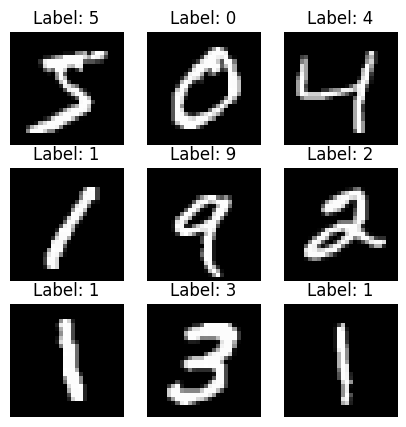

In [180]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Shape sebelum resize: (10000, 28, 28)
Shape sesudah resize: (10000, 32, 32)


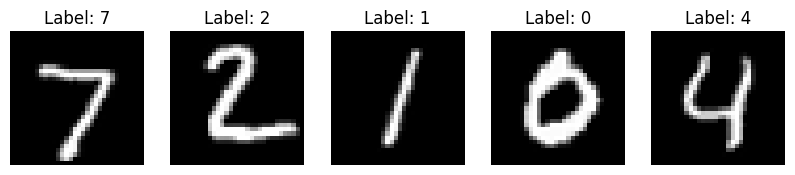

In [181]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

# Buat array kosong untuk menampung hasil upsampling
X_test_up = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

# Loop setiap gambar dan resize
for i in range(X_test.shape[0]):
    X_test_up[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Shape sebelum resize:", X_test.shape)
print("Shape sesudah resize:", X_test_up.shape)

# Tampilkan 5 data hasil upsampling
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_up[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [182]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Normalisasi citra hasil upsampling ke rentang 0–1
X_test_up_norm = X_test_up.astype("float32") / 255.0

print("Shape data:", X_test_up_norm.shape)
print("Nilai minimum:", X_test_up_norm.min())
print("Nilai maksimum:", X_test_up_norm.max())


Shape data: (10000, 32, 32)
Nilai minimum: 0.0
Nilai maksimum: 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [183]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Buat array kosong
X_test_flat = np.zeros((X_test_up_norm.shape[0], 32*32), dtype=np.float32)

# Flatten tiap gambar
for i in range(X_test_up_norm.shape[0]):
    X_test_flat[i] = X_test_up_norm[i].flatten()

print("Shape sebelum flatten:", X_test_up_norm.shape)  # (10000, 32, 32)
print("Shape sesudah flatten:", X_test_flat.shape)     # (10000, 1024)

# Contoh 1 data pertama
print("Contoh array flatten (10 nilai pertama):", X_test_flat[0][:10])


Shape sebelum flatten: (10000, 32, 32)
Shape sesudah flatten: (10000, 1024)
Contoh array flatten (10 nilai pertama): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
